# Shopify Winter 2021 Data Science Intern Challenge #

#### Sana Krichen####


In [1]:
#import regular packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# read the data
df=pd.read_csv('2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv')
df.head(20)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11
5,6,58,882,138,1,credit_card,2017-03-14 15:25:01
6,7,87,915,149,1,cash,2017-03-01 21:37:57
7,8,22,761,292,2,cash,2017-03-08 2:05:38
8,9,64,914,266,2,debit,2017-03-17 20:56:50
9,10,52,788,146,1,credit_card,2017-03-30 21:08:26


In [3]:
# get some info and check if there is any null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
order_id          5000 non-null int64
shop_id           5000 non-null int64
user_id           5000 non-null int64
order_amount      5000 non-null int64
total_items       5000 non-null int64
payment_method    5000 non-null object
created_at        5000 non-null object
dtypes: int64(5), object(2)
memory usage: 273.6+ KB


In [4]:
# check for null values
df.isna().sum()

order_id          0
shop_id           0
user_id           0
order_amount      0
total_items       0
payment_method    0
created_at        0
dtype: int64

In [18]:
#sort the dataframe by shop_id
df.sort_values('shop_id')

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
4515,4516,1,797,316,2,cash,2017-03-17 16:43:51
4657,4658,1,886,316,2,debit,2017-03-02 19:20:24
1190,1191,1,734,316,2,debit,2017-03-03 3:40:15
347,348,1,907,158,1,credit_card,2017-03-03 6:59:35
2587,2588,1,756,316,2,debit,2017-03-30 12:27:19
...,...,...,...,...,...,...,...
649,650,100,851,222,2,debit,2017-03-07 6:02:56
3981,3982,100,818,111,1,cash,2017-03-23 21:34:27
4204,4205,100,847,333,3,debit,2017-03-18 11:13:20
3989,3990,100,889,333,3,debit,2017-03-05 0:13:44


# Question 1#:
Given some sample data, write a program to answer the following: click here to access the required data set

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

    * Think about what could be going wrong with our calculation. 
    * Think about a better way to evaluate this data. 
    * What metric would you report for this dataset?
    * What is its value?


In [6]:
df[df['shop_id']==1].shape

(44, 7)

In [19]:
# check for outliers
df['total_items'].max()  # from the result, this value is surely an unusual event

2000

In [21]:
#check the average value for the order_amount
df['order_amount'].mean()

3145.128

In [43]:
# Now let's check the median value for the order_amount
df['order_amount'].median()

284.0

In [44]:
#check the average value for the total_items
df['total_items'].mean()


8.7872

In [45]:
#check the median value for the total_items
df['total_items'].median()

2.0

In [42]:
# check how many orders have a total number of items =2000
df[df['total_items']==df['total_items'].max()].shape

(17, 7)

In [11]:
df.groupby(by=['total_items'])

In [12]:
# check the number of orders for every total_items
df['total_items'].value_counts().sort_index()

1       1830
2       1832
3        941
4        293
5         77
6          9
8          1
2000      17
Name: total_items, dtype: int64

In [13]:

ind=df['total_items'].value_counts().sort_index().index
ind=list(map(str, ind))
val=df['total_items'].value_counts().sort_index().values

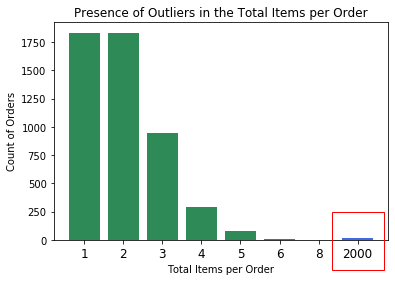

In [37]:
# plot a bqr chart that displays the count of orders for every total items per orders 
# and that point out to the outliers

custom_colors = ['royalblue' if i in [ind[-1]] else 'seagreen' for i in list(map(str, ind))]
fig, ax = plt.subplots(nrows=1, ncols=1)
plt.bar(ind,val,color=custom_colors)
plt.xlabel('Total Items per Order')
plt.ylabel('Count of Orders')
plt.xticks(fontsize=12)
plt.title('Presence of Outliers in the Total Items per Order')
fig.patches.extend([plt.Rectangle((0.77,0.02),0.12,0.2,
                                  fill=False, color='r', zorder=1000,
                                  transform=fig.transFigure, figure=fig)])
plt.savefig('outliers.png')
plt.show()
